In [1]:
!mkdir -p ~kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats --force

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 85.6MB/s]
100% 1.06G/1.06G [00:13<00:00, 81.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 111ms/step - loss: 1.0941 - accuracy: 0.6062 - val_loss: 0.6767 - val_accuracy: 0.6234
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5384 - accuracy: 0.7262 - val_loss: 0.5020 - val_accuracy: 0.7560
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4612 - accuracy: 0.7861 - val_loss: 0.4331 - val_accuracy: 0.8028
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3898 - accuracy: 0.8278 - val_loss: 0.5002 - val_accuracy: 0.7808
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3168 - accuracy: 0.8629 - val_loss: 0.5051 - val_accuracy: 0.7802
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2505 - accuracy: 0.8935 - val_loss: 0.6079 - val_accuracy: 0.8044
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1733 - accuracy: 0.9321 - val_loss: 0.6994 - val_ac

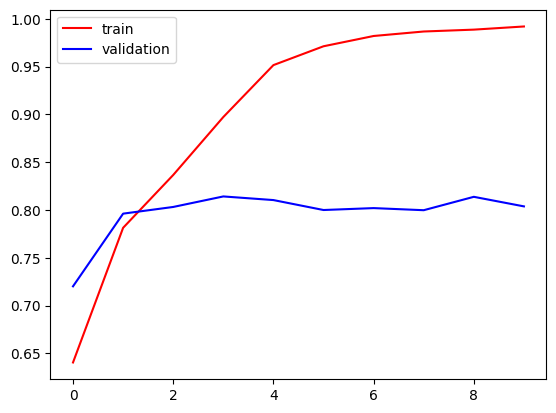

In [11]:
#before dropout or batch normalization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

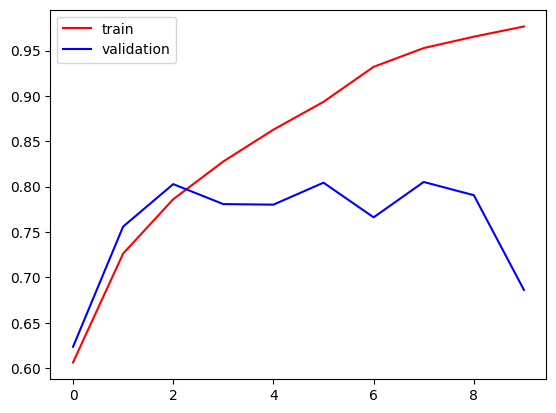

In [20]:
#after dropout or batch normalization
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

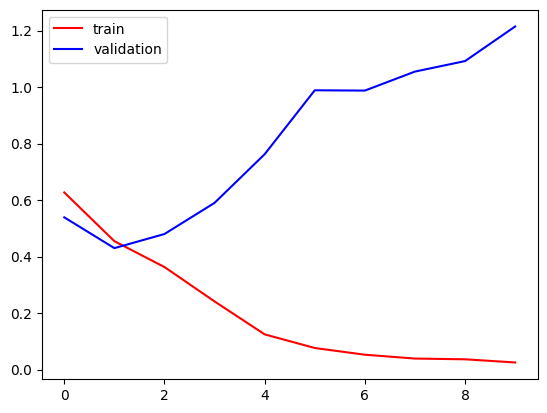

In [12]:
#before dropout or batch normalization
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

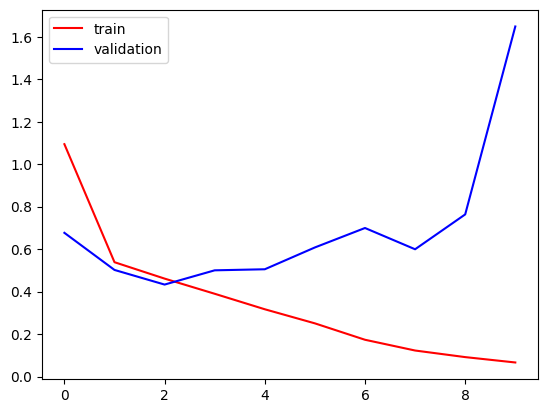

In [21]:
#after dropout or batch normalization
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [23]:
import cv2

In [60]:
test_img = cv2.imread('/content/cat.jpg')

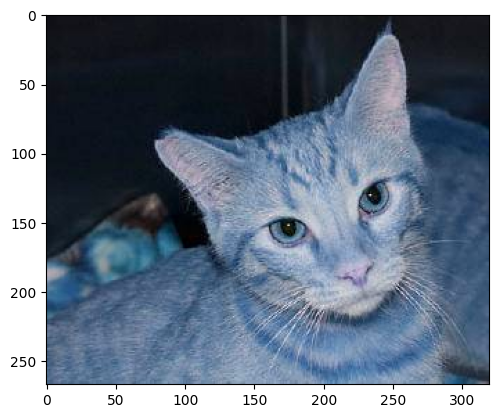

In [61]:
plt.imshow(test_img)

In [62]:
test_img.shape

(267, 320, 3)

In [63]:
test_img = cv2.resize(test_img,(256,256))

In [64]:
test_input = test_img.reshape((1,256,256,3))

In [65]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)

In [ ]:
# 0 is indicating this is cat

In [44]:
test_img = cv2.imread('/content/dog.jpg')

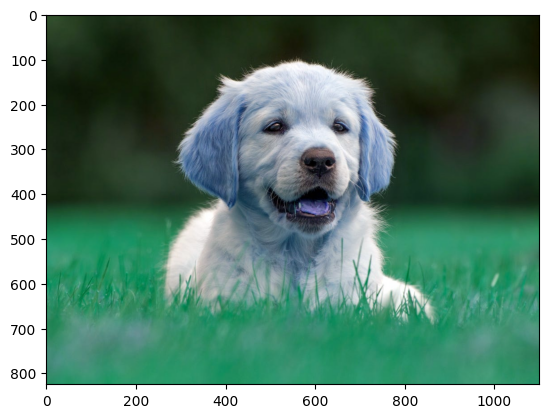

In [45]:
plt.imshow(test_img)

In [47]:
test_img.shape

(825, 1100, 3)

In [49]:
test_img = cv2.resize(test_img,(256,256))

In [50]:
test_input = test_img.reshape((1,256,256,3))

In [51]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)

In [ ]:
# 1 is indicating this is dog